# Named Entity Recognition

Named entity recognition (NER) is a text preprocessing technique that identifies and categorizes named entities in text, such as people, organizations, 
locations, dates, and other entities. By identifying and categorizing named entities in text, we can answer questions such as 
“who,” “what,” “when,” “where,” and “how” more accurately. Here are a few examples of common NER tags:

Common NER tags : 

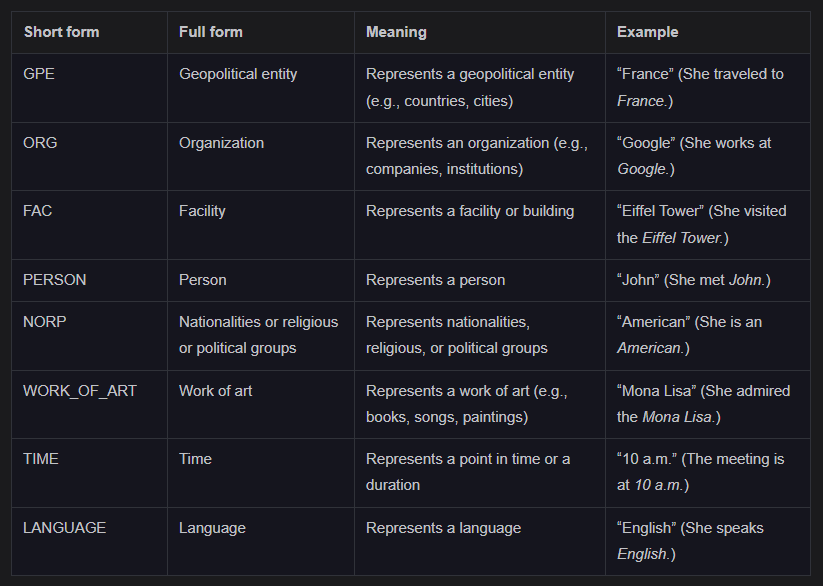

Application areas of NER include information retrieval, question answering, sentiment analysis, etc. However, while applying this method, it’s important to note that incomplete or erroneous analysis might result from improper NER execution. For instance, if all the listed entities in a text are not identified, chances to extract useful information or provide answers to crucial issues might be lost. The fact that named entities can take many distinct forms and be referred to in various ways presents another difficulty. For example, a person can be addressed by their given name, first name, last name, or nickname. To go about these challenges, regular evaluation and iterative improvement can guarantee accurate entity extraction.



In [1]:
! pip install nltk

In [33]:
! pip install spacy

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.1 MB 2.0 MB/s eta 0:00:07
   ---------------------------------------- 0.1/12.1 MB 1.7 MB/s eta 0:00:08
    --------------------------------------- 0.2/12.1 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/12.1 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/12.1 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/12.1 MB 1.8 MB/s eta 0:00:07
   - -------------------------------------- 0.5/12.1 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.5/12.1 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.6/12.1 MB 1.4 MB/s eta 0:00:09
   -- ------------------------------------- 0.7/12.1 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.7/12.1 MB 1.4 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/12.1 MB 1.4 MB/s eta 0:00:09
   -- 

In [38]:
! pip install spacy

In [41]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 525.1 kB/s eta 0:00:25
     --------------------------------------- 0.1/12.8 MB 819.2 kB/s eta 0:00:16
      --------------------------------------- 0.3/12.8 MB 1.5 MB/s eta 0:00:09
     - -------------------------------------- 0.5/12.8 MB 2.3 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/12.8 MB 3.1 MB/s eta 0:00:04
     --- ------------------------------------ 1.0/12.8 MB 3.1 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/12.8 MB 4.0 MB/s eta 0:00:03
     ----- ---------------------------------- 1.6/12.8 MB 4.1 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 3.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 3.5 MB/s eta 0:00:04
     ------ --------------------------------- 1.9/12.8 MB 3.5 MB

In [ ]:
# Example1 with reviews_uk dataset

In [42]:
# a.import necessary libaries and download

import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

In [43]:
# b. load the required dataset

df = pd.read_csv("C:/Users/ariji/OneDrive/Desktop/Data/reviews_uk.csv")
pd.set_option('display.max_colwidth', 300)
df.head()

,review_id,text
0,txt1,"I recently visited London, and the British Museum and Buckingham Palace were among the highlights of my trip."
1,txt2,"While exploring Edinburgh, I had the chance to try traditional haggis at a local restaurant and visit the historic Edinburgh Castle."
2,txt3,"During my stay in Oxford, I attended lectures at the prestigious University of Oxford and explored the charming Bodleian Library."
3,txt4,"I watched a play at Shakespeare's Globe Theatre in London, and the performance was outstanding."
4,txt5,"My favorite British author is Charles Dickens, and his novel 'Great Expectations' is a literary masterpiece."


In [48]:
# c. Define extract entities function

def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [49]:
# d. Call the extract_entities function

df['ner_tags'] = df['text'].apply(extract_entities)
print(df['ner_tags'])

0                 [(London, GPE), (the British Museum, ORG), (Buckingham Palace, FAC)]
1                                       [(Edinburgh, PERSON), (Edinburgh Castle, FAC)]
2                [(Oxford, ORG), (University of Oxford, ORG), (Bodleian Library, LOC)]
3                         [(Shakespeare, PERSON), (Globe Theatre, ORG), (London, GPE)]
4    [(British, NORP), (Charles Dickens, PERSON), ('Great Expectations', WORK_OF_ART)]
5                                                                  [(Manchester, GPE)]
6             [(Scotland, GPE), (Loch Ness, PERSON), (Loch Ness Monster, WORK_OF_ART)]
7                           [(afternoon, TIME), (Windsor, GPE), (Windsor Castle, FAC)]
8                                                                [(English, LANGUAGE)]
9                                                     [(London, GPE), (West End, GPE)]
Name: ner_tags, dtype: object


In [52]:
# e. visualize the finalized datafame

df

,review_id,text,ner_tags
0,txt1,"I recently visited London, and the British Museum and Buckingham Palace were among the highlights of my trip.","[(London, GPE), (the British Museum, ORG), (Buckingham Palace, FAC)]"
1,txt2,"While exploring Edinburgh, I had the chance to try traditional haggis at a local restaurant and visit the historic Edinburgh Castle.","[(Edinburgh, PERSON), (Edinburgh Castle, FAC)]"
2,txt3,"During my stay in Oxford, I attended lectures at the prestigious University of Oxford and explored the charming Bodleian Library.","[(Oxford, ORG), (University of Oxford, ORG), (Bodleian Library, LOC)]"
3,txt4,"I watched a play at Shakespeare's Globe Theatre in London, and the performance was outstanding.","[(Shakespeare, PERSON), (Globe Theatre, ORG), (London, GPE)]"
4,txt5,"My favorite British author is Charles Dickens, and his novel 'Great Expectations' is a literary masterpiece.","[(British, NORP), (Charles Dickens, PERSON), ('Great Expectations', WORK_OF_ART)]"
5,txt6,"I traveled to Manchester, and the ancient stone circle left me in awe of its mysterious history.","[(Manchester, GPE)]"
6,txt7,"During my trip to Scotland, I explored the scenic Highlands and Loch Ness, hoping to catch a glimpse of the elusive Loch Ness Monster.","[(Scotland, GPE), (Loch Ness, PERSON), (Loch Ness Monster, WORK_OF_ART)]"
7,txt8,"I enjoyed a traditional afternoon tea in Windsor, where I had scones with clotted cream and visited Windsor Castle.","[(afternoon, TIME), (Windsor, GPE), (Windsor Castle, FAC)]"
8,txt9,I had a delightful fish and chips meal in a quaint English village by the seaside.,"[(English, LANGUAGE)]"
9,txt10,"London's West End theaters offer some of the best musicals and plays in the world, and I thoroughly enjoyed my theater experience.","[(London, GPE), (West End, GPE)]"


In [ ]:
# Example 2 with feedback dataset

In [53]:
# a.import necessary libaries and download

import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

In [54]:
# b. load the required dataset

df = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data/feedback.csv')
pd.set_option('display.max_colwidth', 300)
df.head()

,timestamp,username,feedback,sentiment
0,08-08-2023 10:00,@TechEnthusiast,The new telecom product offers amazing connectivity and lightning-fast speeds. I'm thoroughly impressed!,positive
1,08-08-2023 10:15,@GadgetGuru,The new telecom product is a game-changer! It's made my online gaming experience so much smoother and lag-free.,positive
2,08-08-2023 10:30,@FrequentCaller,I've noticed a significant improvement in call quality and signal strength with the new telecom product. Great job!,positive
3,08-08-2023 10:45,@BusinessOwner,The new product has enhanced our business operations by providing reliable internet for all our devices. A must-have for any office.,positive
4,08-08-2023 11:00,@DigitalNomad,"As a digital nomad, I rely on consistent internet wherever I go. The new telecom product has kept me connected no matter where I am!",positive


In [55]:
# c. Define extract entities function

def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [56]:
# d. Call the extract_entities function

df['ner_tags'] = df['feedback'].apply(extract_entities)
print(df['ner_tags'])

0                    []
1                    []
2                    []
3                    []
4                    []
5                    []
6                    []
7                    []
8    [(first, ORDINAL)]
9                    []
Name: ner_tags, dtype: object


In [57]:
# e. visualize the finalized datafame

df

,timestamp,username,feedback,sentiment,ner_tags
0,08-08-2023 10:00,@TechEnthusiast,The new telecom product offers amazing connectivity and lightning-fast speeds. I'm thoroughly impressed!,positive,[]
1,08-08-2023 10:15,@GadgetGuru,The new telecom product is a game-changer! It's made my online gaming experience so much smoother and lag-free.,positive,[]
2,08-08-2023 10:30,@FrequentCaller,I've noticed a significant improvement in call quality and signal strength with the new telecom product. Great job!,positive,[]
3,08-08-2023 10:45,@BusinessOwner,The new product has enhanced our business operations by providing reliable internet for all our devices. A must-have for any office.,positive,[]
4,08-08-2023 11:00,@DigitalNomad,"As a digital nomad, I rely on consistent internet wherever I go. The new telecom product has kept me connected no matter where I am!",positive,[]
5,08-08-2023 11:15,@ConcernedUser,"While the new product offers good speeds, I experienced occasional dropouts in my connection. Hoping for a fix soon.",neutral,[]
6,08-08-2023 11:30,@SocialMediaAddict,Streaming videos and uploading content has never been smoother. The new telecom product has improved my online presence!,positive,[]
7,08-08-2023 11:45,@BudgetShopper,"The new telecom product is fantastic, but the pricing seems a bit steep. I'd love to see more affordable options.",positive,[]
8,08-08-2023 12:00,@TechNovice,"I was hesitant at first, but the setup process was surprisingly easy. The new telecom product is user-friendly even for beginners like me.",positive,"[(first, ORDINAL)]"
9,08-08-2023 12:15,@PowerUser,"I heavily rely on fast internet for my work, and the new product has exceeded my expectations. It's a definite upgrade.",positive,[]
